Running Passive Cell Tutorial
Creating the soma...
Inserting Hodgkin-Huxley Channels and defining conductances...
Create current injection in the middle of the soma...
Record the results...
Running Program...
Showing Graph...


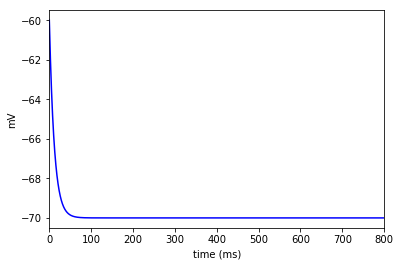

Program Complete...


In [28]:
# Import necessary libraries
from neuron import h
h.load_file("stdrun.hoc")
from IPython.display import display, clear_output
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider

gna = FloatText(value=0)
gk = FloatText(value=0)

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='Sodium Channel (gnabar_hh)'), 
         gna], layout=form_item_layout),
    Box([Label(value='Potassium Channel (gkbar_hh)'), 
         gk], layout=form_item_layout),
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    # border='solid 2px',
    align_items='stretch',
    width='55%'
))
display(form)

button = widgets.Button(description="Run Model")
display(button)

def on_button_clicked(b):
    clear_output()
    print "Running Passive Cell Tutorial"
    print "Creating the soma..."
    #Create the soma section and define the default parameters
    soma = h.Section(name='soma')
    soma.nseg = 1
    soma.diam = 200
    soma.L = 100
    soma.cm = 1.4884e-4/6.2832e-4

    print "Inserting Hodgkin-Huxley Channels and defining conductances..."
    #Insert the Hodgkin-Huxley channels and define the conductances
    soma.insert('hh')
    soma.gnabar_hh = float(gna.value)
    soma.gkbar_hh = float(gk.value)
    soma.gl_hh = 2.0e-5
    soma.el_hh = -70

    #v_init = h.v_init= -60

    print "Create current injection in the middle of the soma..."
    #Inject current in the middle of the soma
    stim = h.IClamp(0.5)
    stim.delay = 100
    stim.dur = 500
    stim.amp = 1

    tstop = h.tstop = 800   #ms

    #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++#
    print "Record the results..."
    #Record Results  
    h.dt = 0.025

    v0_vec = h.Vector()
    t_vec = h.Vector()

    v0_vec.record(soma(0.5)._ref_v)
    t_vec.record(h._ref_t)

    print "Running Program..."
    h.run()

    print "Showing Graph..."
    #Visualize Results
    from matplotlib import pyplot
    pyplot.figure()
    pyplot.plot(t_vec, v0_vec,'b')
    pyplot.xlim(0, 800)
    pyplot.xlabel('time (ms)')
    pyplot.ylabel('mV')
    pyplot.show()

    print "Program Complete..."

button.on_click(on_button_clicked)

In [29]:
# Hide Code Initially and then show if user would like to see
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code